In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [8]:
X.head(3)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled.shape

(400, 2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Jay Sunil Sonawane\anaconda3\envs\dsml_40_env1\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=320,validation_split=0.2)
print(time.time() - start)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9187 - loss: 0.2127 - val_accuracy: 0.9375 - val_loss: 0.2577
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.9187 - loss: 0.2128 - val_accuracy: 0.9375 - val_loss: 0.2737
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.9187 - loss: 0.2125 - val_accuracy: 0.9375 - val_loss: 0.2625
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9187 - loss: 0.2123 - val_accuracy: 0.9375 - val_loss: 0.2673
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9187 - loss: 0.2122 - val_accuracy: 0.9375 - val_loss: 0.2631
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9187 - loss: 0.2121 - val_accuracy: 0.9375 - val_loss: 0.2662
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9187 - loss: 0.2120 - val_accuracy: 0.9375 - val_loss: 0.2636
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.9187 - loss: 0.2120 - val_accuracy: 0.9375 - val_

In [17]:
# 18 seconds required

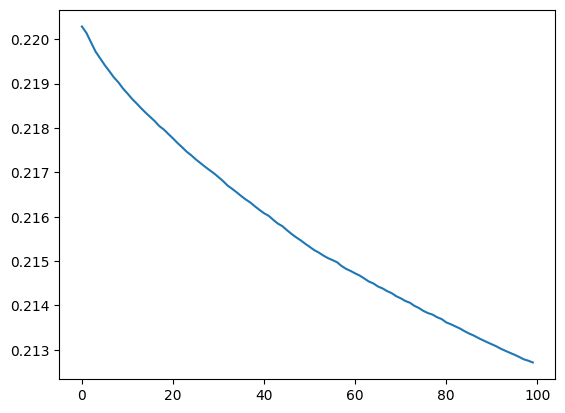

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])